In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
x = np.arange(0.01, 1., .01)
ctr = np.arange(0.1, 1., .1)

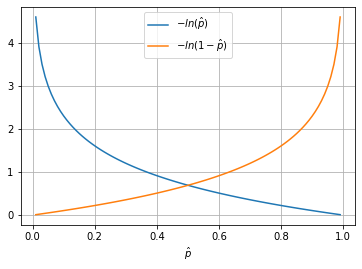

In [3]:
sb.lineplot(x, -np.log(x), label=r'$-ln(\hat p)$')
sb.lineplot(x, -np.log(1 - x), label=r'$-ln(1-\hat p)$')
plt.legend(loc=9)
plt.xlabel(r'$\hat p$');
plt.grid();
plt.savefig('images/neg_log_neg_log_reflect.png', bbox_inches='tight');

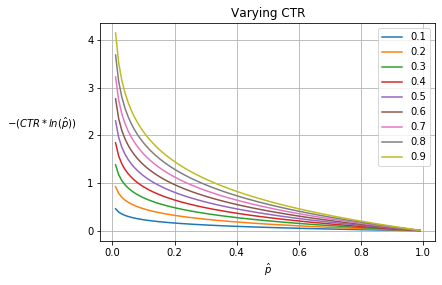

In [4]:
for _ctr in ctr:
    sb.lineplot(x, -_ctr * np.log(x), label=round(_ctr, 2));

plt.title('Varying CTR');
plt.ylabel('$-(CTR*ln(\hat p))$', rotation=0, labelpad=45);
plt.xlabel(r'$\hat p$');
plt.grid();
plt.savefig('images/ctr_neg_log.png', bbox_inches='tight');

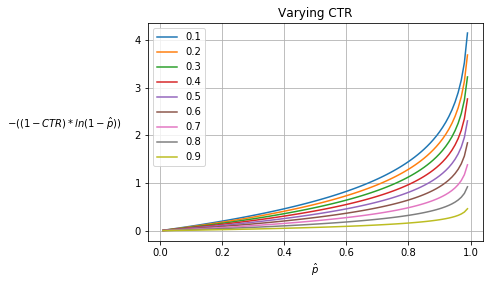

In [5]:
for _ctr in ctr:
    sb.lineplot(x, -(1 - _ctr) * np.log(1 - x), label=round(_ctr, 2));

plt.title('Varying CTR');
plt.ylabel('$-((1-CTR)*ln(1-\hat p))$', rotation=0, labelpad=70);
plt.xlabel(r'$\hat p$');
plt.grid();
plt.savefig('images/ctr_neg_log_reflect.png', bbox_inches='tight');

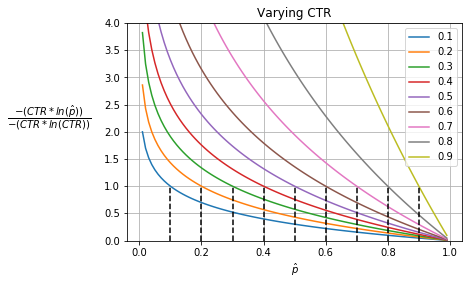

In [6]:
for _ctr in ctr:
    sb.lineplot(x, (-_ctr * np.log(x)) / (-_ctr * np.log(_ctr)), label=round(_ctr, 2));
    plt.axvline(_ctr, ymin=0, ymax=.25, c='black', linestyle='--')
    
plt.title('Varying CTR');
plt.ylabel('$\dfrac{-(CTR*ln(\hat p))}{-(CTR*ln(CTR))}$', rotation=0, labelpad=55);
plt.xlabel(r'$\hat p$');
plt.ylim(0,4)
plt.grid();
plt.savefig('images/ctr_neg_log_norm.png', bbox_inches='tight');

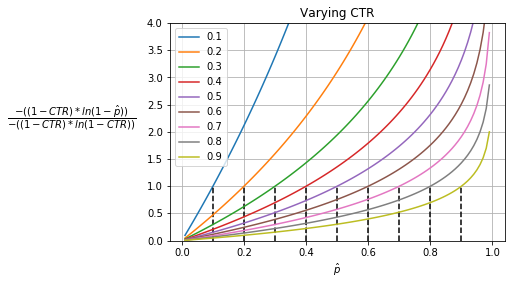

In [7]:
for _ctr in ctr:
    sb.lineplot(x, (-(1 - _ctr) * np.log(1 - x)) / (-(1 - _ctr) * np.log(1 - _ctr)), label=round(_ctr, 2));
    plt.axvline(_ctr, ymin=0, ymax=.25, c='black', linestyle='--')
    
plt.title('Varying CTR');
plt.ylabel('$\dfrac{-((1-CTR)*ln(1-\hat p))}{-((1-CTR)*ln(1-CTR))}$', rotation=0, labelpad=75);
plt.xlabel(r'$\hat p$');
plt.ylim(0,4)
plt.grid();
plt.savefig('images/ctr_neg_log_norm_reflect.png', bbox_inches='tight');

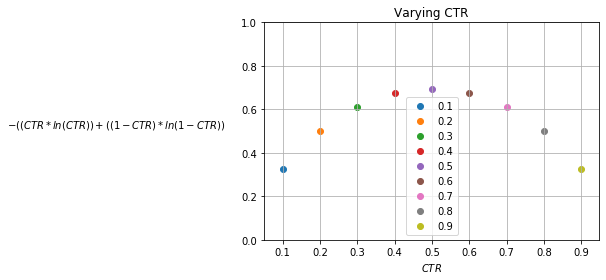

In [8]:
for _ctr in ctr:
    ctr_ent = -((_ctr * np.log(_ctr)) + ((1 - _ctr) * np.log(1 - _ctr)))
    plt.scatter(_ctr, ctr_ent, label=round(_ctr, 2));

plt.title('Varying CTR');
plt.ylabel('$-((CTR*ln(CTR))+((1-CTR)*ln(1-CTR))$', rotation=0, labelpad=125);
plt.xlabel(r'$CTR$');
plt.ylim(0,1)
plt.grid();
plt.legend();
plt.savefig('images/ctr_ent.png', bbox_inches='tight');

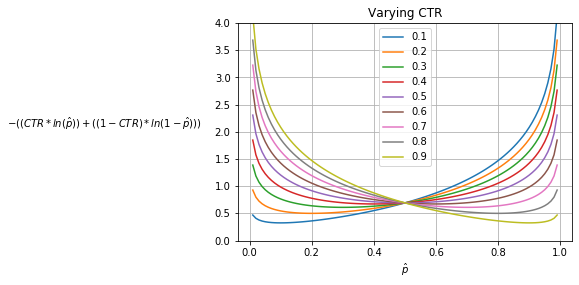

In [9]:
for _ctr in ctr:
    cross_ent = -((_ctr * np.log(x)) + ((1 - _ctr) * np.log(1 - x)))
    sb.lineplot(x, cross_ent, label=round(_ctr, 2));
    
plt.title('Varying CTR');
plt.ylabel('$-((CTR*ln(\hat p))+((1-CTR)*ln(1-\hat p)))$', rotation=0, labelpad=110);
plt.xlabel(r'$\hat p$');
plt.ylim(0,4)
plt.grid();
plt.savefig('images/ctr_cross_ent.png', bbox_inches='tight');

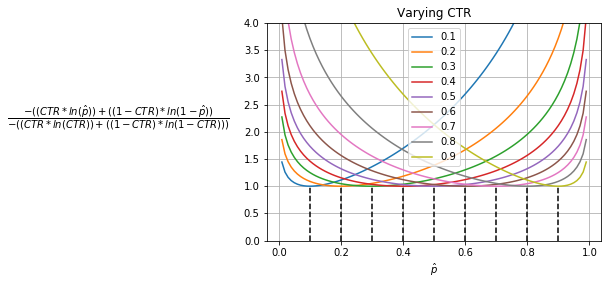

In [10]:
for _ctr in ctr:
    cross_ent = -((_ctr * np.log(x)) + ((1 - _ctr) * np.log(1 - x)))
    ctr_ent = -((_ctr * np.log(_ctr)) + ((1 - _ctr) * np.log(1 - _ctr)))
    ne = cross_ent / ctr_ent
    sb.lineplot(x, ne, label=round(_ctr, 2));
    plt.axvline(_ctr, ymin=0, ymax=.25, c='black', linestyle='--')

plt.title('Varying CTR');
plt.ylabel('$\dfrac{-((CTR*ln(\hat p))+((1-CTR)*ln(1-\hat p))}{-((CTR*ln(CTR))+((1-CTR)*ln(1-CTR)))}$',
           rotation=0, labelpad=125);
plt.xlabel(r'$\hat p$');
plt.ylim(0,4)
plt.grid();
plt.savefig('images/ctr_norm_cross_ent.png', bbox_inches='tight');

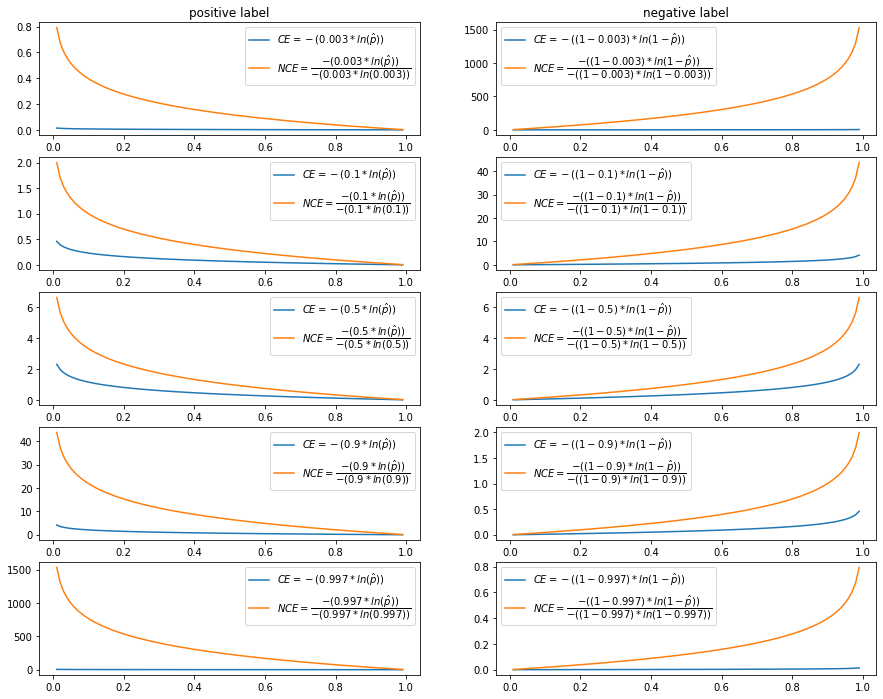

In [11]:
ctr = [.003, .1, .5, .9, .997]
fig, ax = plt.subplots(5, 2, figsize=(15, 12))
i = 0

for _ctr in ctr:

    sb.lineplot(x,
                -(_ctr * np.log(x)),
                label='$CE=-(%s*ln(\hat p))$' % _ctr,
                ax=ax[i][0]);
    sb.lineplot(x,
                (-(_ctr * np.log(x)) / (-(_ctr * np.log(_ctr)))),
                label='$NCE=\dfrac{-(%s*ln(\hat p))}{-(%s*ln(%s))}$' % (_ctr, _ctr, _ctr),
                ax=ax[i][0]);

    sb.lineplot(x,
                -((1 - _ctr) * np.log(1 - x)),
                label='$CE=-((1-%s)*ln(1-\hat p))$' % _ctr,
               ax=ax[i][1]);
    sb.lineplot(x,
                (-((1 - _ctr) * np.log(1 - x)) / (-((1 - _ctr) * np.log((1 - _ctr))))),
                label='$NCE=\dfrac{-((1-%s)*ln(1-\hat p))}{-((1-%s)*ln(1-%s))}$' % (_ctr, _ctr, _ctr),
               ax=ax[i][1]);
    
    i += 1
    
ax[0][0].set_title('positive label');
ax[0][1].set_title('negative label');
plt.savefig('images/ctr_ce_nce.png', bbox_inches='tight');

In [12]:
# see https://www.math3d.org/nobk3tHh to continue with 3D viz